# Final Results of all the models

In [1]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../utils/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../utils/model_evaluator.py")
model_evaluator = loader.load_module()
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import sklearn.metrics as metrics
import model_evaluator
import data_import
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools

In [2]:
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')

This code is made up only to plot ROC curves.

In [3]:
knn_clf=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
tree_clf=DecisionTreeClassifier(random_state=0,max_depth=15).fit(X_train,y_train)
forest_clf=RandomForestClassifier(n_estimators=90,max_depth=16).fit(X_train,y_train)
lin_svm_clf=SVC(kernel='linear', C=6.67).fit(X_train,y_train)
rbf_svm_clf=SVC(kernel='rbf', C=5.56, gamma=0.11).fit(X_train,y_train)
#14min

In [4]:
y_rbf = rbf_svm_clf.decision_function(X_test)
y_lin = lin_svm_clf.decision_function(X_test)
y_knn = knn_clf.predict_proba(X_test)
y_tree = tree_clf.predict_proba(X_test)
y_forest = forest_clf.predict_proba(X_test)

/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



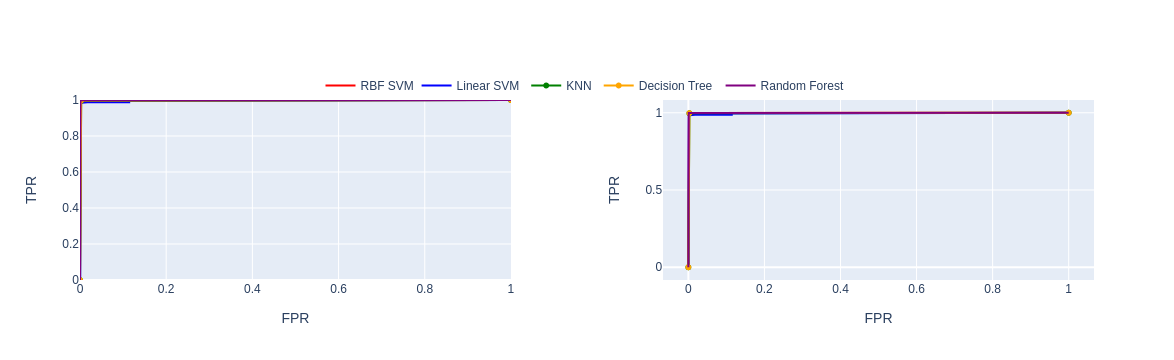

In [5]:
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_rbf)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_lin)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn[:,1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_tree[:,1])
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_forest[:,1])

fig = tools.make_subplots(rows=1, cols=2, horizontal_spacing=0.15)
showlegend=True
for i in [1,2]:
    fig.add_trace(go.Scatter(x=fpr_rbf, y=tpr_rbf, name='RBF SVM', showlegend=showlegend,line=dict(color='red')),row=1,col=i)
    fig.add_trace(go.Scatter(x=fpr_lin, y=tpr_lin, name='Linear SVM',showlegend=showlegend,line=dict(color='blue')),row=1,col=i)
    fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, name='KNN', showlegend=showlegend,line=dict(color='green')),row=1,col=i)
    fig.add_trace(go.Scatter(x=fpr_tree, y=tpr_tree, name='Decision Tree', showlegend=showlegend,line=dict(color='orange')),row=1,col=i)
    fig.add_trace(go.Scatter(x=fpr_forest, y=tpr_forest, name='Random Forest', showlegend=showlegend,line=dict(color='purple')),row=1,col=i)
    showlegend=False
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1, xanchor="center", x=0.5),
                  yaxis_range=[0,1],
                  xaxis_range=[0,1])
fig.update_xaxes(title_text="FPR")
fig.update_yaxes(title_text="TPR")
fig.show()